# Homework Answer

* Họ và tên: Nguyễn Vạn Phúc Huy 
* MSSV: 23110163

1. Tasks
    * Choose any image from the Internet and perform the following operations:
    * Write a function to provide basic information about the image:
      * Determine whether the image is color (RGB) or grayscale.
      * Print the minimum and maximum pixel values for each channel.
    * Bit-plane slicing (one bit-plane per channel):
      * Display 1 bit-plane image for each of the R, G, B channels (3 images in total).
      * Display 1 bit-plane image for each of the H, S, V channels (3 images in total).
    * Display histograms of the RGB channels and the HSV channels.
    * Enhancement using thresholds on the Value channel (V in HSV):
      * Choose a low threshold and a high threshold.
      * For pixels below the low threshold → make them darker.
      * For pixels above the high threshold → make them brighter.

2. Short Report
    * Present the original image and all transformed images.
    * Write a short caption/description for each step

Import Libs

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt    
from pylab import imread

Getting image

Image size: (1057, 1920, 4)
Image data type: float32


Text(0.5, 1.0, 'Grayified Image')

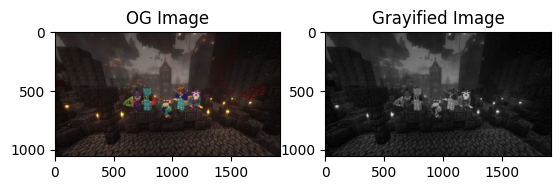

In [52]:
newImg = imread('minecraft.png')
# print image size (y,x, kênh màu)
print("Image size:", newImg.shape)
# print image data type 
print("Image data type:", newImg.dtype)

# convert to gray
newImg_grayified = cv2.cvtColor(newImg, cv2.COLOR_BGR2GRAY)

# print images
plt.subplot(1, 2, 1)
plt.imshow(newImg)
plt.title("OG Image")


plt.subplot(1, 2, 2)
plt.imshow(newImg_grayified, cmap='gray')
plt.title("Grayified Image")


Function to check if image is gray or RGB

In [53]:
def isGrayOrRGBImage(img):
    if len(img.shape) < 3: # gray image is 2-d vector
        return "true - gray image"
    else:
        return "false - RGB image"
#test
print("OG - is gray:", isGrayOrRGBImage(newImg))
print("Grayified - is gray:", isGrayOrRGBImage(newImg_grayified))

OG - is gray: false - RGB image
Grayified - is gray: true - gray image


Function to get min and max pixel values for each channel

In [54]:
# output will be min[r,g,b] and max[r,g,b] for RGB image, [min, max] for gray image
def getMinMaxPixelValues(img):
    if len(img.shape) == 2: # gray image
        min_val = np.min(img)
        max_val = np.max(img)
        return (min_val, max_val)
    elif len(img.shape) == 3: # RGB image
        min_vals = []
        max_vals = []
        for i in range(img.shape[2]): # for each channel
            min_vals.append(np.min(img[:, :, i]))
            max_vals.append(np.max(img[:, :, i]))
        return (min_vals, max_vals)
    
#test
print("OG Image min/max pixel values:", getMinMaxPixelValues(newImg))
print("Grayified Image min/max pixel values:", getMinMaxPixelValues(newImg_grayified))

OG Image min/max pixel values: ([np.float32(0.023529412), np.float32(0.015686275), np.float32(0.015686275), np.float32(1.0)], [np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0)])
Grayified Image min/max pixel values: (np.float32(0.016580394), np.float32(1.0))


Display 1 bit-plane image for each of the R, G, B channels (3 images in total)

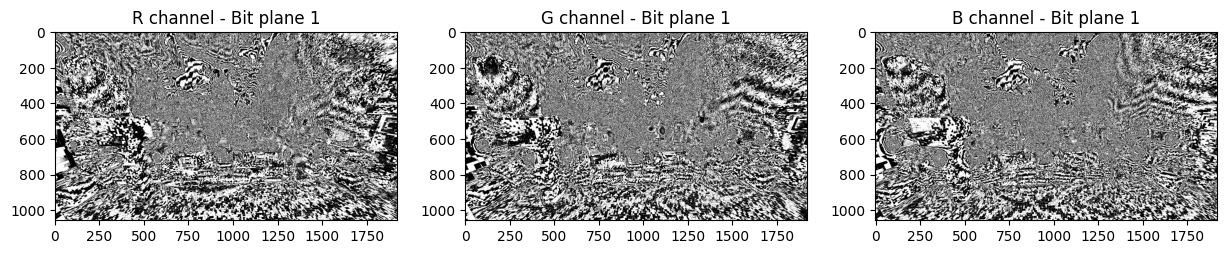

In [55]:
# create newImg in uint8
newImg_uint8 = (newImg * 255).astype(np.uint8)
# Slicing
BIT_PLANE_VALUE = 2  # 1, 2, 4, 8, 16, 32, 64, 128 (level 0-7)
BIT_INDEX = int(np.log2(BIT_PLANE_VALUE)) # get bit level instead manual cuz lazy

r_channel = newImg_uint8[:, :, 2]
g_channel = newImg_uint8[:, :, 1]
b_channel = newImg_uint8[:, :, 0]

# Convert img to bit-plane images
bit_plane_r = cv2.bitwise_and(r_channel, BIT_PLANE_VALUE)
bit_plane_g = cv2.bitwise_and(g_channel, BIT_PLANE_VALUE)
bit_plane_b = cv2.bitwise_and(b_channel, BIT_PLANE_VALUE)
# plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(bit_plane_r, cmap='gray')
plt.title(f"R channel - Bit plane {BIT_INDEX}")

plt.subplot(1, 3, 2)
plt.imshow(bit_plane_g, cmap='gray')
plt.title(f"G channel - Bit plane {BIT_INDEX}")

plt.subplot(1, 3, 3)
plt.imshow(bit_plane_b, cmap='gray')
plt.title(f"B channel - Bit plane {BIT_INDEX}")
plt.show()


Display 1 bit-plane image for each of the H, S, V channels (3 images in total).

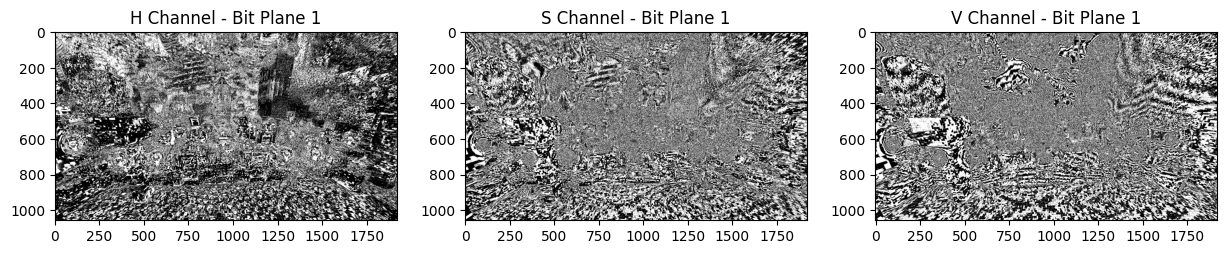

In [56]:
# Convert RGB to HSV
hsvImg = cv2.cvtColor(newImg_uint8, cv2.COLOR_BGR2HSV)

# Slicing
BIT_PLANE_VALUE = 2
BIT_INDEX = int(np.log2(BIT_PLANE_VALUE)) # get bit level instead manual cuz lazy

h_hsvImg = hsvImg[:, :, 0]
s_hsvImg = hsvImg[:, :, 1]
v_hsvImg = hsvImg[:, :, 2]

# Convert img to bit-plane images
bit_plane_H = cv2.bitwise_and(hsvImg[:, :, 0], BIT_PLANE_VALUE)
bit_plane_S = cv2.bitwise_and(hsvImg[:, :, 1], BIT_PLANE_VALUE)
bit_plane_V = cv2.bitwise_and(hsvImg[:, :, 2], BIT_PLANE_VALUE)

# plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(bit_plane_H, cmap='gray')
plt.title(f"H Channel - Bit Plane {BIT_INDEX}")

plt.subplot(1, 3, 2)
plt.imshow(bit_plane_S, cmap='gray')
plt.title(f"S Channel - Bit Plane {BIT_INDEX}")

plt.subplot(1, 3, 3)
plt.imshow(bit_plane_V, cmap='gray')
plt.title(f"V Channel - Bit Plane {BIT_INDEX}")
plt.show()

Display histograms of the RGB channels and the HSV channels

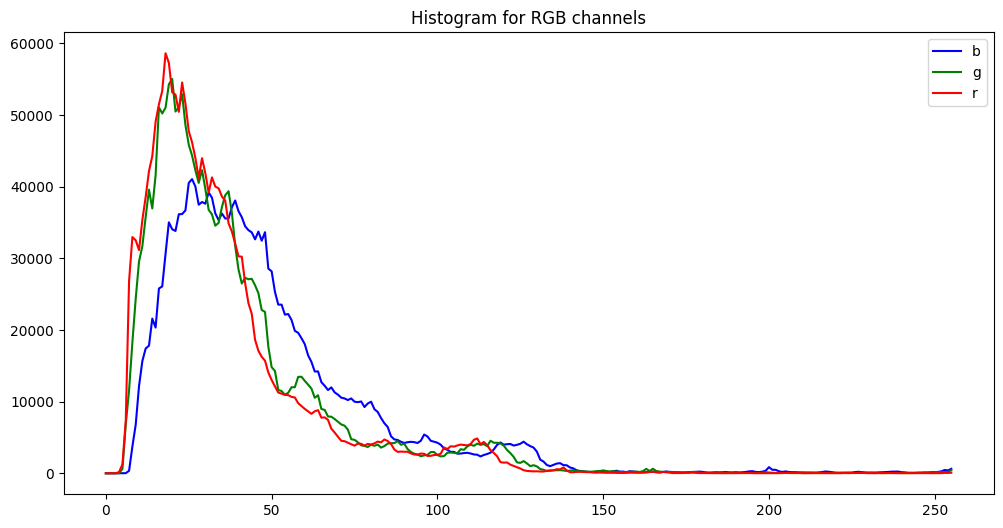

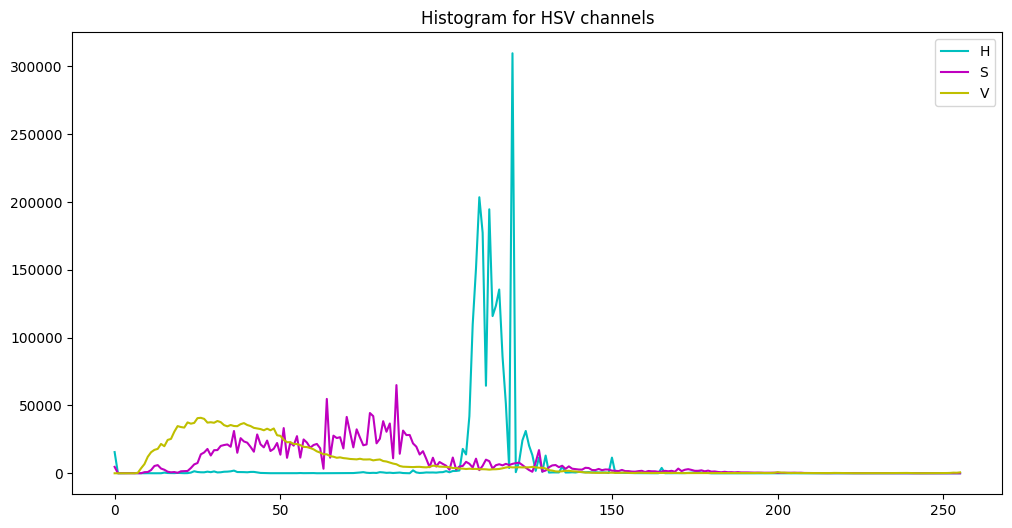

In [57]:
#Display histograms of the RGB channels and the HSV channels.
# RGB
color = ('b','g','r')
plt.figure(figsize=(12, 6))
for i, col in enumerate(color):
    histr = cv2.calcHist([newImg_uint8], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.legend(color)
plt.title("Histogram for RGB channels")
plt.show()
# HSV - Corrected Legend
color = ('c','m','y')
names = ('H', 'S', 'V')
plt.figure(figsize=(12, 6))
lines = [] 
for i, col in enumerate(color):
    histr = cv2.calcHist([hsvImg], [i], None, [256], [0, 256])
    line, = plt.plot(histr, color=col)
    lines.append(line)

plt.legend(lines, names)
plt.title("Histogram for HSV channels")
plt.show()